# Tutorial 01 - Managing map plotting with Healpy

**Angelo Ricciardone (Universita degli Studi di Pisa)**

## Observational Astrophysics course AA 2023/24

## In this tutorial we will learn how to use the Healpy library. Healpy is a Python library designed for working with HEALPix (Hierarchical Equal Area isoLatitude Pixelization) maps commonly used in astrophysics, particularly in cosmology and CMB (Cosmic Microwave Background) studies.


```Install Healpy```

There are a number of ways of installing the latest version of the astropy core package. If you normally use pip to install Python packages, you can do:

```bash
pip install healpy[recommended] --upgrade
```

If instead you normally use conda, you can do:
```bash
conda install -c conda-forge healpy
```

or using update instead of install if healpy is already installed. 


In [3]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt


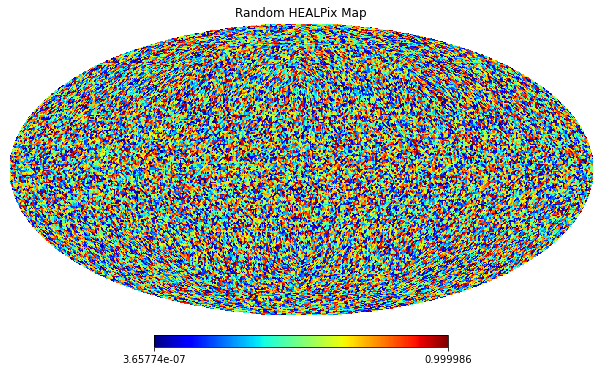

In [4]:
# Generate a random HEALPix map
nside = 64  # Set the resolution
npix = hp.nside2npix(nside)  # Calculate the number of pixels
cmb_map = np.random.rand(npix)  # Random values for each pixel

# Visualize the map
hp.mollview(cmb_map, title='Random HEALPix Map', cmap='jet')



In [ ]:
# Read a HEALPix map from file
cmb_map_file = 'your_cmb_map.fits'
cmb_map_data = hp.read_map(cmb_map_file)

# Visualize the map
hp.mollview(cmb_map_data, title='CMB Map from File', cmap='jet')


In [ ]:
# Smooth the map
smoothed_map = hp.smoothing(cmb_map_data, fwhm=np.radians(1))

# Rotate the map
rotated_map = hp.rotate_map(cmb_map_data, coord='C')  # Rotate to Galactic coordinates

# Extract a region of interest
lon = np.radians(180)
lat = np.radians(0)
region_map = hp.query_disc(cmb_map_data, lonlat=True, lon=lon, lat=lat, radius=np.radians(10))

# Visualize the manipulated maps
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

hp.mollview(smoothed_map, title='Smoothed Map', cmap='jet', ax=axes[0])
hp.mollview(rotated_map, title='Rotated Map', cmap='jet', ax=axes[1])
hp.mollview(region_map, title='Region of Interest', cmap='jet', ax=axes[2])

plt.tight_layout()
plt.show()


In [ ]:
# Generate a HEALPix map from coordinates
lon = np.radians(180)
lat = np.radians(0)
pix_index = hp.ang2pix(nside, lon, lat)

# Create a map with a single pixel at the specified coordinates
coord_map = np.zeros(npix)
coord_map[pix_index] = 1

# Visualize the map
hp.mollview(coord_map, title='Map from Coordinates', cmap='jet')
